# KNN
## K Nearest Neighbours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

X.shape, y.shape

((100, 2), (100,))

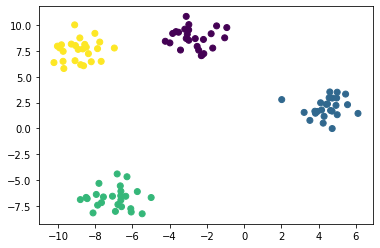

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
point = np.array([-2, 0])

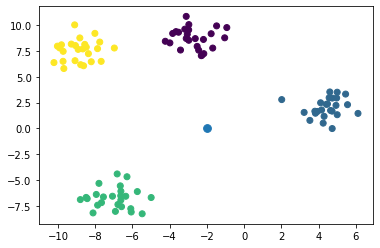

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(point[0], point[1], s=60)

### Eucledian Distance

In [32]:
distances = np.sqrt(np.sum((X - point) ** 2, axis=1))

In [7]:
distances.argsort()

array([50, 26, 13, 49, 99, 61, 89, 93, 70, 41, 66, 68, 39,  7, 51, 97, 90,
       85, 57, 80, 91, 17, 73, 11, 31, 78,  8, 24,  6, 36, 53, 92, 82, 23,
       87, 12, 38, 84, 71, 52, 58, 32, 69, 88, 20, 37, 33, 30, 44, 45, 59,
       35, 74, 76, 86, 60, 27,  3, 65,  1, 81, 77, 10, 14, 83, 46, 79, 43,
       42, 56,  5,  9,  2,  0, 19, 62, 63, 95, 75, 34, 96, 67, 25, 98, 47,
        4, 29, 21, 40, 16, 55, 18, 94, 22, 54, 15, 48, 28, 72, 64])

In [8]:
k = 15

In [9]:
selected = distances.argsort()[:k]

In [10]:
y[selected]

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1])

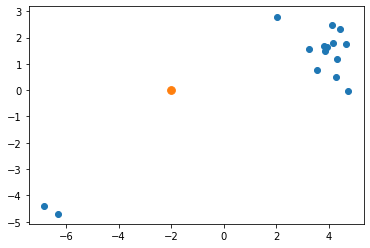

In [20]:
X_selected = X[selected]
plt.scatter(X_selected[:, 0], X_selected[:, 1])
plt.scatter(point[0], point[1], s=60)

## Sklearn

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
model = KNeighborsClassifier()

In [95]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
model.predict([point])

array([1])

In [98]:
model.score(X, y)

1.0

## Custom

In [13]:
class customKNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        
    def predict_point(self, point):
        distances = np.sqrt(np.sum((self.__X - point) ** 2, axis=1))
        
        sorted_distances = distances.argsort()
        
        k_index = sorted_distances[:self.n_neighbors]
        
        votes = self.__y[k_index]
        
        values, counts = np.unique(votes, return_counts=True)
        
        return values[counts.argmax()]
    
    def predict(self, points):
        result = []
        
        for i in points:
            result.append(self.predict_point(i))
            
        return result
    
    def score(self, X, y):
        yp = self.predict(X)
        
        return np.mean(yp == y)

In [14]:
model = customKNN(n_neighbors=5)

In [15]:
model.fit(X, y)

In [16]:
model.score(X, y)

1.0